# Model Selection
Often, we won't know beforehand which features to use or engineer for our models, especially when there are many features to choose from. It would be nice if we could determine which features to use before we invest any time in feature engineering.


Instead of having just one model, we'll often need to craft **multiple models with different combinations** of features to try to maximize predictive ability.



# Sequential Feature Selection

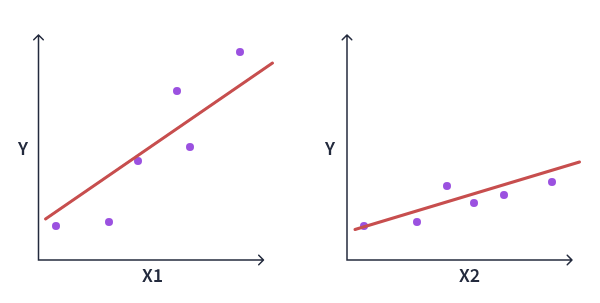

Intuitively, we might want to include both features, **X1 and X2**, in a regression model. What this approach fails to consider is that X1  and X2
 might be correlated with each other. If this is the case, having X1 in a model alone will produce similar results to having X2 in a model, but including them both won't add extra benefit. We might mistakenly believe X2 is a useful feature and attempt to use it in future models, making them more complex than they need to be.

 This weakness highlights a need for an approach that selects groups of features for a model. This process is called sequential feature selection, also known as subset selection. scikit-learn provides some functionality for implementing subset selection.

There are two main methods of **sequential feature selection** that we'll learn: **forward selection and backward selection.** Both methods produce a model with a subset of features that perform well based on some metric, such as MSE, but they differ in their approach to how the features are chosen.

###fORWARD SELECTION

In forward selection, we start with an intercept-only model (a regression model without predictors). Then, the algorithm iterates over each feature in the dataset to see which one would produce the best model if it were added. The metric used to define "best" is a cross-validation score such as MSE or accuracy. After iterating through each feature, the one that produces the best metric is added to the model. Once this feature is added, this process is repeated until we reach some pre-specified number of features or the metric does not improve substantially with the addition of more features.

The class that implements forward selection is the SequentialFeatureSelector class.

    from sklearn.feature_selection import SequentialFeatureSelector
    from sklearn.linear_model import LinearRegression

    lm = LinearRegression()

    forward_lm = SequentialFeatureSelector(estimator=lm,
                                          n_features_to_select=2,
                                          direction="forward")
    forward_lm.fit(X, y)

For now, we'll consider three parameters when dealing with the SequentialFeatureSelector class:

`estimator`: this is an object used to construct the models during feature selection, such as LinearRegression or RandomForestClassifier.

`n_features_to_select`: this is a positive integer that describes how many features we want to be used in the resulting model.

`direction`: this is a string that describes the type of sequential feature selection we want to do ("forward" or "backward") as a string.

In order to see what features were actually included in the model, we can use the `get_feature_names_out()` method after creating a SequentialFeatureSelector() object and calling the `fit()` method on it.

    features = forward_lm.get_feature_names_out()

In [1]:
# Model Selection

import numpy as np
import pandas as pd
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

housing = pd.read_csv('housing.csv').dropna()

X = housing.drop(["ocean_proximity", "median_house_value"], axis=1)
y = housing["median_house_value"]



model = LinearRegression()

forward_lm = SequentialFeatureSelector(estimator=model,
                                          n_features_to_select=4,
                                          direction="forward")
forward_lm.fit(X, y)
forward_features = forward_lm.get_feature_names_out()
print(forward_features)

['housing_median_age' 'total_rooms' 'total_bedrooms' 'median_income']


##Backward Selection

Forward selection starts with an intercept-only model, while backward selection starts with a full model that uses all the features in the dataset.

**Backward selection** then removes a single feature from the model and reevaluates the metric. The algorithm repeats this process for every feature present in the full model. This results in several metrics, each evaluated on a model where a single predictor is removed. Backward selection chooses the model with the best metric and repeats until we reach the desired number of features specified by the `n_features_to_select` argument.

Thankfully, backward selection is also implemented by the `SequentialFeatureSelector` class. We only need to change the direction parameter from "**forward" to "backward"**.

    from sklearn.feature_selection import SequentialFeatureSelector
    from sklearn.linear_model import LinearRegression

    lm = LinearRegression()

    backward_lm = SequentialFeatureSelector(estimator=lm,
                                            n_features_to_select=2,
                                            direction="backward")
    backward_lm.fit(X, y)


Both of these algorithms make decisions based on the current set of features, and they choose whichever feature best improves the metric immediately. **This does not guarantee **that the subset of features chosen is actually the optimal subset. To find the optimal subset of features, we would need to test all different combinations of predictors.

If there are P predictors, then we would need to evaluate $2^p$ models. This can be time-consuming for even a moderate number of predictors, so greedy approaches like forward or backward selection get around this problem by choosing from current subsets.

In [2]:
#Backward selection
backward_lm = SequentialFeatureSelector(estimator=model,
                                          n_features_to_select=4,
                                          direction="backward")

backward_lm.fit(X, y)
backward_features = backward_lm.get_feature_names_out()
n_same_features = forward_features==backward_features
print(backward_features)

['longitude' 'latitude' 'total_bedrooms' 'median_income']


# Criterion-Based Selection

Forward and backward selection give us algorithms to quickly select a reasonable subset of features for a candidate model.

There are some occasions when we might need another tool. One such occasion is when we have limited data, and by extension, don't have much data to allocate to a test set. When this happens, we may want to use a **criterion-based approach** for model selection. We'll compute some criterion (other than test error) for every candidate model that we have and then choose the model that produces the best criterion.

## Akaike Information Criterion (AIC)

There are several criteria we can use, and the first one we'll look at is the **Akaike Information Criterion (AIC).** The Akaike Information Criterion is a value that estimates the prediction error of a model.

$\text{AIC} = 2p - 2 \, \text{ln}(\hat{L})$

Where $p$ represents the number of features using in the model

$\hat{L}$ represents the **likelihood** of the model

With linear regression, the likelihood of the model is proportional to sum of squared error (SSE), where $ϵ$ represents the error (i.e., the difference between the actual values in the dataset and predicted values from our model). Without delving into the derivation, the AIC can be written in terms of the SSE as follows:

$\text{AIC} = 2p + n \, \text{ln}(\text{SSE})$

where n represents the number of observations in the dataset.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

housing = pd.read_csv('housing.csv').dropna()

X = housing.drop(["ocean_proximity", "median_house_value"], axis=1)
y = housing["median_house_value"]

model = LinearRegression()

def AIC(p, n, SSE):
    return 2 * p + 2 * n * np.log(SSE)


#sequential with 2 features
sfs2 = SequentialFeatureSelector(model,n_features_to_select=2,direction="forward")

#sequential with 5 features
sfs5 = SequentialFeatureSelector(model,n_features_to_select=5,direction="forward")

#fit
sfs2.fit(X, y)
sfs5.fit(X,y)

#get features
features2 = sfs2.get_feature_names_out()
features5 = sfs5.get_feature_names_out()

#create new model with subset
X2 = X[features2]
X5 = X[features5]
n=len(X)

lm2 = LinearRegression()
lm5 = LinearRegression()

#fit new model
lm2.fit(X2,y)
lm5.fit(X5,y)

y_pred2 = lm2.predict(X2)
y_pred5 = lm5.predict(X5)

#Calculate SSE from mean_squared_error
#y - y_pred
sse2 = mean_squared_error(y,y_pred2)*n
sse5 = mean_squared_error(y,y_pred5)*n

aic2 = AIC(len(features2),n,sse2)
aic5 = AIC(len(features5),n,sse5)

## Bayesian Information Criterion

The Bayesian Information Criterion (BIC) is just like the AIC, but it uses a different first term:

$\text{BIC} = p \, \text{ln}(n) - 2 \, \text{ln}(\hat{L})$

In the BIC, the first term — $p \, \text{ln}(n)$ — is the product of the number of features (p) and the natural log of the sample size (n). Compared to the AIC, this first term will be larger provided n>=8. Similar to the AIC, the model with the smallest BIC will be considered the best. The BIC can be seen as more critical of larger models, due to $p \, \text{ln}(n)$ being much larger than **2p**.

As a result, models chosen via BIC tend to have fewer features than those chosen by AIC, but this isn't a concrete rule.

## Adjusted R²

The coefficient of determination, R², is another value that we can calculate for linear regression models. This value estimates how much variation in the outcome the predictors can explain. The coefficient of determination is calculated like this:

$\displaystyle R^2 = 1 - \frac{\text{SSE}_p}{\text{SSE}_\text{total}}$

SSE_p - represents the sum of squared error of the model using p predictors.

SSE_total -  represents the total variation in the outcome Y

A high R² indicates that the model explains much of the variance in the outcome and is desired. However, we cannot use R² directly as a model selection tool. It turns out that the SSE_p cannot decrease as more predictors are added to the model, so the R² will either remain the same or increase in this case. We should be acutely aware of the danger of overfitting the model, but the R²
 doesn't provide a way to do this.

 The adjusted R² incorporates a term involving the number of features (p) that serves to penalize complex models. If the model gets larger without offering enough benefit to reducing error, it decreases the adjusted R². So, when we're picking among many models with different numbers of predictors, we can choose the one with the highest adjusted R².

 The adjusted R² can, in theory, reach an upper threshold of 1, but this would imply that the model produces perfect predictions, and there would be no need for model selection. However, in practice, no model is a perfect predictor.

 $\displaystyle\text{Adjusted }R^2 = 1 - \frac{\left(1 - R^2\right) \, \left(n - 1\right)}{n - p - 1}$

 When we use **AIC** or **BIC**, we choose models based on the smallest value.

 When using the adjusted **R²**, we must choose the model with the largest value. When using these metrics, this is a subtlety that needs to be kept in mind, or you might be led to incorrect conclusions.

# The Curse of Dimensionality

In housing, the number of observations (n) is much higher than the number of predictors (p) in the dataset. In this context, there's no trouble creating models like regressions, but this won't always be the case.

In other situations, the reverse might be true: a large number of features (columns) but a smaller number of observations. When this happens, we say that the dataset has **high dimensionality.**

In some cases, such as linear regression, high dimensionality prevents us from even creating a model when n < p.

A common theme when dealing with high dimensionality is to strategically reduce the number of features we need to consider for the model. This process is called **dimension reduction**. One popular technique for dimension reduction is **principal component analysis (PCA)**. PCA seeks to reduce the dimensions of the data by creating a new dataset with features based off of the original data. This new dataset will have fewer features than observations, which allows us to use all of the techniques we've learned so far.


## PCA

A feature created by PCA is called a principal component. A principal component
z is a **linear combination of the original features** (X). So, the first principal component z1 would be constructed as:

$z_1 = a_1X_1 + ... + a_pX_p$

The weights **a1,.....,a_p** are chosen by PCA such that the first principal component contains the most variance in the original dataset. Having high variance means that the values of z1 will be highly spread out. Being more spread out allows us to see how the outcome Y can vary with z1 while preserving the variance in the original dataset.

After the first principal component is made, the second is constructed similarly, using all of the variance remaining after the first one is created. The other principal components are created iteratively in this way.

Done this way, the first principal component will explain the most variance, and the second wil explain the second-most. When the number of principal components equals the original number of features **p**, then the original dataset is essentially recreated. We can reduce dimensionality by only choosing a small number of principal components that explain some high degree of variance in the original dataset, **say 90%.**

## PCA in SKLearn

`scikit-learn` implements PCA under the PCA class in the `decomposition` module. When we instantiate a `PCA()` object, we choose the number of principal components we want to create. Then, we can fit this `PCA()` object on a dataset.

    from sklearn.decomposition import PCA
    pca = PCA(n_components=3)
    pca.fit(X)

To understand how much variance is explained by each principal component, we can use the `explained_variance_ratio_` attribute.

 To get the total variance explained, we can take the `sum() `of the `explained_variance_ratio_` attribute to get a float value that represents the percentage of the variance being explained.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

housing = pd.read_csv('housing.csv').dropna()

X = housing.drop(["ocean_proximity", "median_house_value"], axis=1)
y = housing["median_house_value"]

model = LinearRegression()

#instantiate with 1 component
pca = PCA(n_components=1)
pca.fit(X)

var_explained_1 = pca.explained_variance_ratio_[0]

#2 components represents 99% of dataset variance
n_pc_99= 2